In [31]:
import pandas as pd
import numpy as np

In [76]:
pd.set_option('display.max_columns', None)

In [163]:
df_people = pd.read_csv('./ifood_people.csv', parse_dates=True)
df_campaing = pd.read_csv('./ifood_previous_campaing.csv', parse_dates=True)
df_purchase = pd.read_csv('./ifood_purchase_profile.csv', parse_dates=True)

In [164]:
df_geral = pd.merge(df_people, df_purchase, 'left', 'ID')
df_geral = pd.merge(df_geral, df_campaing, 'left', 'ID')
df_geral.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [165]:
display(df_geral.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

None

In [166]:
df_geral['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [171]:
df_geral.sort_values('Income', ascending=False).head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,3,11,0
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,3,11,0


In [172]:
df_geral['Income'] = df_geral['Income'].apply(lambda value: np.nan if value > 200000 else value)
df_geral.sort_values('Income', ascending=False).head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,3,11,0
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,3,11,0


In [173]:
df_geral['Income'].describe()

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: Income, dtype: float64

In [174]:
df_geral.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)
df_geral['Age'] = 2020 - df_geral['Year_Birth']
df_geral.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,63
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,66
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,55
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,36
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,39


In [176]:
display(df_geral['Age'].describe())
display(df_geral.sort_values('Age', ascending=False).head())
#3 outliers nas idades

count    2240.000000
mean       51.194196
std        11.984069
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max       127.000000
Name: Age, dtype: float64

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,127
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,121
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0,120
1950,6663,1940,PhD,Single,51141.0,0,0,2013-07-08,96,144,0,7,0,0,6,1,3,1,4,5,0,0,0,0,0,0,0,80
424,6932,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,42,716,55,0,21,0,7,10,5,2,0,0,1,0,0,0,0,79


In [177]:
display(df_geral['Marital_Status'].value_counts())

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [178]:
df_geral['Marital_Status'] = df_geral['Marital_Status'].apply(lambda status: 'Unknown' if status in ['YOLO', 'Absurd', 'Alone'] else status)
display(df_geral['Marital_Status'].value_counts())

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Unknown       7
Name: count, dtype: int64

In [179]:
df_geral['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [180]:
df_geral['Education'] = df_geral['Education'].str.replace('2n Cycle', 'High School')

In [181]:
income_education = df_geral.groupby(['Education']).agg({'Income':'mean'}).reindex(['Basic', 'High School', 'Graduation', 'Master', 'PhD'])
display(income_education)

,Income
Education,
Basic,20306.259259
High School,47633.190000
Graduation,52169.749776
Master,52917.534247
PhD,56145.313929


# O Income está diretamente ligado ao nível de educação

<Axes: xlabel='Education'>

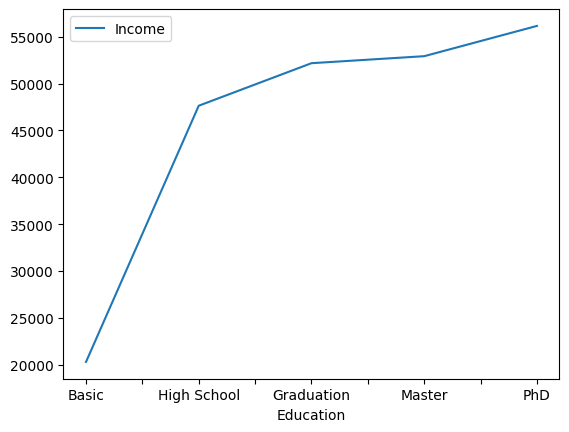

In [145]:
income_education.plot()

In [137]:
df_geral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2215 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [182]:
df_geral['TotalPurchases'] = df_geral[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

df_geral.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,TotalPurchases
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,63,25
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,66,6
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,55,21
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,36,8
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,39,19


# Criar campanhas paras pessoas com status com parceiros pode ser mais viável, visto que existem mais pedidos

In [183]:
df_geral.groupby('Marital_Status').agg({'TotalPurchases':'sum'}).sort_values('TotalPurchases')

,TotalPurchases
Marital_Status,
Unknown,117
Widow,1286
Divorced,3535
Single,6837
Together,8594
Married,12922


In [203]:
idades = [20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 128]
categorias = ['20~29', '30~39', '40~49', '50~59', '60~69', '70+']


df_geral['Category'] = pd.cut(df_geral['Age'], bins=idades, labels=categorias, right=True)

df_geral.sort_values('Category', ascending=False)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,TotalPurchases,Category
239,11004,1893,High School,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,127,4,70+
1873,6715,1948,PhD,Single,60200.0,0,1,2013-01-02,3,502,19,132,0,6,26,6,6,2,11,6,0,0,0,0,0,0,0,72,25,70+
1895,3578,1949,Graduation,Divorced,49160.0,0,1,2013-10-20,29,122,21,43,25,10,15,2,3,1,6,6,0,0,0,0,0,0,0,71,12,70+
1898,4619,1945,PhD,Single,113734.0,0,0,2014-05-28,9,6,2,3,1,262,3,0,27,0,0,1,0,0,0,0,0,0,0,75,27,70+
103,9370,1945,PhD,Married,65846.0,0,0,2013-05-17,68,562,81,276,80,40,81,1,6,3,6,4,0,0,0,0,0,0,0,75,16,70+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,2109,1990,Graduation,Single,96843.0,0,0,2013-04-23,60,448,71,951,40,17,17,1,6,11,10,2,0,0,1,0,0,0,1,30,28,20~29
309,1379,1992,Master,Together,42670.0,0,0,2013-04-27,12,154,2,46,20,4,15,1,4,2,4,4,0,0,0,0,0,0,0,28,11,20~29
1343,2253,1990,Graduation,Married,18929.0,0,0,2013-02-16,15,32,0,8,23,4,18,1,1,0,4,6,0,0,0,0,0,0,0,30,6,20~29
1722,569,1991,Graduation,Single,90273.0,0,0,2013-12-14,32,704,129,853,120,74,111,1,5,6,7,2,0,1,1,1,0,0,1,29,19,20~29


In [211]:
cat_buy = df_geral.groupby('Category', observed=True).agg({
    'MntWines':'sum',
    'MntMeatProducts':'sum',
    'MntFishProducts':'sum',
    'MntSweetProducts':'sum',
    'MntGoldProds':'sum'
})

<Axes: xlabel='Category'>

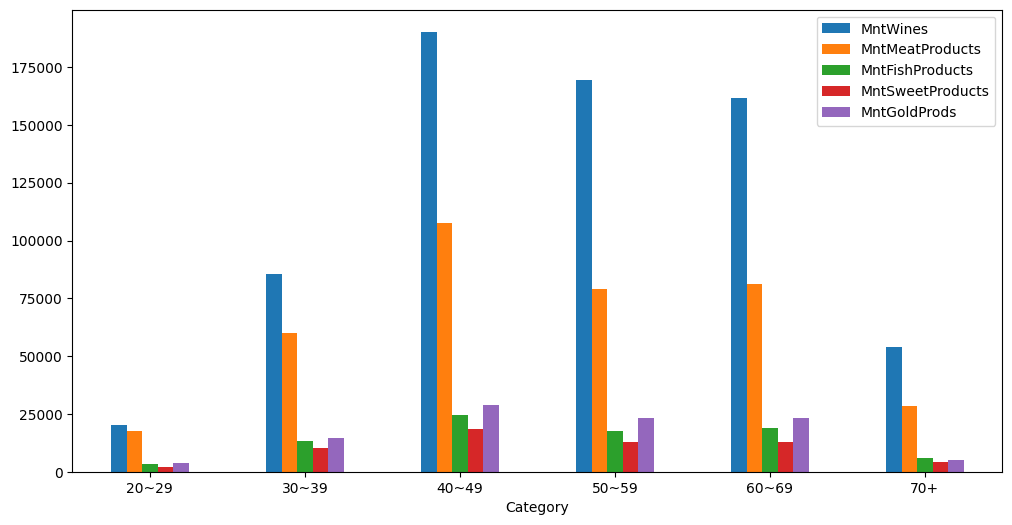

In [219]:
cat_buy.plot(kind='bar', figsize=(12, 6), rot=0)

In [ ]:
df_geral.groupby('Category', observed=True).agg({
    'MntWines':'sum',
    'MntMeatProducts':'sum',
    'MntFishProducts':'sum',
    'MntSweetProducts':'sum',
    'MntGoldProds':'sum'
})